# Polynomial Regression

**Learning Objective**:

- Understand polynomial regression

- Learn feature transformation using `sklearn`


**Detailed Syllabus**:

- Polynomial Regression

- Feature transformation

- Implementation using `sklearn`


## Polynomial Equation

As you have seen in the previous notebooks, a linear regression model is able to approximate the linear relationship between independent variable $x$ and dependent variable $y$. But, as we try to solve real world problem, the relationship is not always linear. In this unit we are going to cover the non-linear (polynomial) relationship between dependent variable $y$ and independent variable $x$. It means the variable $y$ is a polynomial function of variable $x$. A polynomial equation of degree two in $x$ can be written as,
$$
y = ax^2 + bx + c \tag{1}
$$

With polynomial regression, we are approximating a polynomial curve that can be a parabola, hyperbola and others as the degree of polynomial varies.

The equation $(1)$ has only one independent variable $x$, however, this is not a simple linear regression. It's because we have two parameters $x$ and $x^2$. Even though $x^2$ is a transformation on the feature $x$, we consider it another parameter for our model. As the degree of polynomial increases, we get the terms like $x^3, x^4, \dots, x^n$.

The equation $(1)$ with regression coefficients $\beta$ can be written as,

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2
$$

This is similar to our simple linear regression equation $y = \beta_0 + \beta_1 x$, because the model is still linear in parameters $\boldsymbol\beta$.

In simple term, a polynomial regression introduces polynomial of features. If we have two features $x_1$ and $x_2$, the polynomial features with degree two can have terms like $1, x_1, x_2, x_1 x_2, x_1^2, x_2^2$. Here the number of features has increased from two to seven including the bias term after the polynomial feature transformation. So, when using a linear model for the transformed features, we will have a model with seven parameters as,

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + \beta_4 x_1 ^2 + \beta_5 x_2 ^2
$$


## Polynomial Feature Transformation

### Polynomial Feature transformation with sklearn

`Sklearn` provides a [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class to help us transform our original features to polynomial features of any degree. After that, we can simply use a linear regression model to obtain a polynomial regression model.

Here, we will use the case of simple linear regression with varying degree of polynomial and visualize the curve fitted by those models. We will have only one feature $x$ and the target value will be $y$. The data is generated by sine function with added noise. We will try to approximate our sine function with polynomial with varying degree.

### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display

### Generate Artificial Data

We will generate some data points using `sin` function. We will add some noise to make is similar to the real world observation.

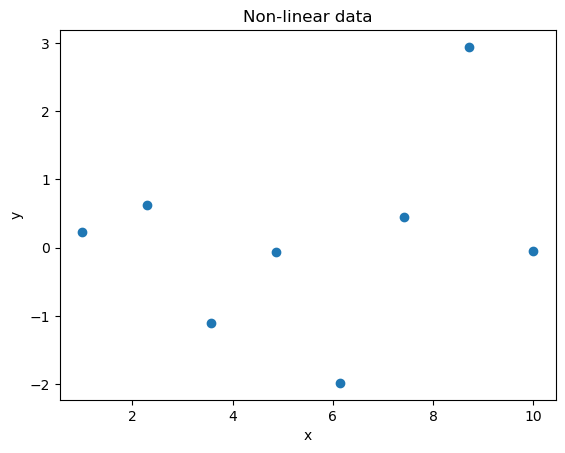

In [9]:
# Generate N number of points from _FROM to _TO
_FROM, _TO, N = 1, 10, 8

x = np.linspace(_FROM, _TO+1e-3, N)

# Add random seed for reproducibility
np.random.seed(40)

# Get output from sin function with added noise
y = np.sin(x) + np.random.normal(scale=1, size=x.shape[0])

X = x.reshape((-1, 1))

# Visualize the generated data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-linear data')
plt.show()

### Fitting a Linear Regression model

In [11]:
def visualize_model(model, title=None, tr=None):
    _x = np.linspace(_FROM - 1e-1, _TO + 1e-2, 200)
    _xr = _x.reshape(-1, 1)
    if tr:
        _xr = tr.transform(_xr)

    _y = model.predict(_xr)

    # print(y.shape)
    plt.plot(_x, _y, color='green')
    plt.scatter(x, y, color='blue')
    plt.xlabel('x')
    plt.ylabel('y')
    if title:
        plt.title(title)

[]

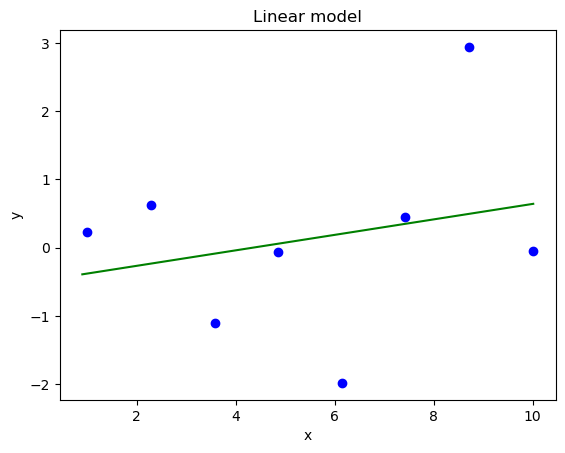

In [12]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X, y)

visualize_model(linear, title='Linear model')

plt.plot()

As you can see, the linear model is unable to capture the relationship of the data. It is because the model is a line, while the data is from a sinusoidal curve. To capture the relationship of the data, a non-linear model with the capability of representing sinusoidal function is required.

### Polynomial Regression


Here, we will train the same linear model with the polynomial features of varying degrees. We will use [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class from `sklearn` to transform our feature to specific degree.

In [13]:
# Import PolynomialFeatures from sklearn
from sklearn.preprocessing import PolynomialFeatures

# DEGREE FROM _FROM_DEGREE TO _TO_DEGREE WITH _DEGREE_STEP STEP VALUE
_FROM_DEGREE, _TO_DEGREE, _DEGREE_STEP = 1, 8, 1

# Create a range of degree of polynomial equation
degrees = range(_FROM_DEGREE, _TO_DEGREE+1, _DEGREE_STEP)

ncols = 3
nrows = int(np.ceil(len(degrees)/ncols))

# plt.figure(figsize=(12, 16))

models = []

for degree in degrees:
    # Transform the feature
    poly_feature = PolynomialFeatures(degree=degree)

    X_tr = poly_feature.fit_transform(X)
    # Using same linear regression model
    linear_model = LinearRegression()

    # Fit model wit transformed feature
    linear_model.fit(X_tr, y)

    models.append([degree, linear_model, poly_feature])

### Model visualization with different degree

In [14]:
#@title Visualization code (utils.py)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display


def animate_figure(x,y,models,_FROM,_TO):

  # For animation

  # fig, ax = plt.subplots()
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(1, 1, 1)

  ax.set_ylim(-0.5, 2.5)
  # ax.set_xlim()
  print(x.shape, y.shape)
  ax.scatter(x, y, c='blue')

  x_data = np.linspace(_FROM - 1e-1, _TO + 1e-2, 200)
  x_in = x_data.reshape(-1, 1)

  line,  = ax.plot(x_data, x_data, c='green')

  line.set_xdata(x_data)

  def anim_init():
      line.set_ydata([np.nan] * len(x_data))
      return line, 

  def animate_fn(a):
      deg, model, tr = models[a]
      x_dt = tr.transform(x_in)

      _y = model.predict(x_dt)
      line.set_ydata(_y)

      ax.set_title(f'Model with degree: {deg}')

      return line, 

  anim = animation.FuncAnimation(fig, animate_fn, frames=len(models), interval=2000, blit=True)

  video = anim.to_html5_video()
  html = display.HTML(video)
  display.clear_output(wait=True)
  display.display(html)

  plt.close()

In [15]:
# Import file containing code of animation
# from utils import animate_figure

# Call function to create animation
animate_figure(x,y,models,_FROM,_TO)

In the above animation, you can see that as the degree of polynomial increases, the model becomes more complex. A complex model is something that can learn non-linear relationship between the features. The real data comes form a sinusoidal function that in the above model is accurately approximated by the model with degree four. You might think that as the model becomes more complex, the approximated function is more qualified representation of data. Contrary to this belief, the function representation does not necessarily improve as we increase the degree of polynomial. This is surprising because every $n^{th}$ degree polynomial incorporates all the polynomial with degree lesser than $n$ in it. You will understand this effect in the next paragraph.

Before we model our data, we should have a clear understanding of the data itself. In general, the observed data contains noise that comes from various sources like faulty measurement, error in device calibration, etc. So, when trying to model a data, unknowingly we are modeling the noise too. This is the reason, why just using a large model won't improve the polynomial model.